# Análisis en  relación con el punto de Regresión lineal múltiple

In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('matriculaciones_2021_2023.txt', sep='\t', parse_dates=['Registration_Date'])

# Análisis exploratorio básico
print(df.head())
print(df.info())





  Registration_Date Brand_Name Model_Name Province_Registration
0        2022-12-29       Jeep   Renegade                HUESCA
1        2021-01-05       Ford     Ranger                HUESCA
2        2022-12-22       Ford     Ranger                HUESCA
3        2023-10-20      Mazda    Mazda 3                HUESCA
4        2021-05-18      Mazda        CX5                HUESCA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3407123 entries, 0 to 3407122
Data columns (total 4 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Registration_Date      datetime64[ns]
 1   Brand_Name             object        
 2   Model_Name             object        
 3   Province_Registration  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 104.0+ MB
None


In [4]:
# Dado que queremos predecir el número de matriculaciones, necesitamos agregar una columna 'Month_Year' y contar las matriculaciones por mes.
df['Month_Year'] = df['Registration_Date'].dt.to_period('M')
monthly_registrations = df.groupby('Month_Year').size()


In [6]:
# Convertimos esto en un DataFrame para poder trabajarlo
monthly_registrations_df = monthly_registrations.reset_index(name='Total_Registrations')

In [8]:
# Convertir a valor númerico para poder contar los meses 
monthly_registrations_df['Month_Num'] = (monthly_registrations_df['Month_Year'] - monthly_registrations_df['Month_Year'].min()).apply(lambda x: x.n)

In [9]:
# Ahora, dividimos los datos en características (X) y objetivo (y)
X = monthly_registrations_df[['Month_Num']]
y = monthly_registrations_df['Total_Registrations']

In [10]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Evaluar el modelo
y_pred = model.predict(X_test)
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred)}")

Error cuadrático medio (MSE): 383854895.4717735


## Predicciones

c:\Users\paulq\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


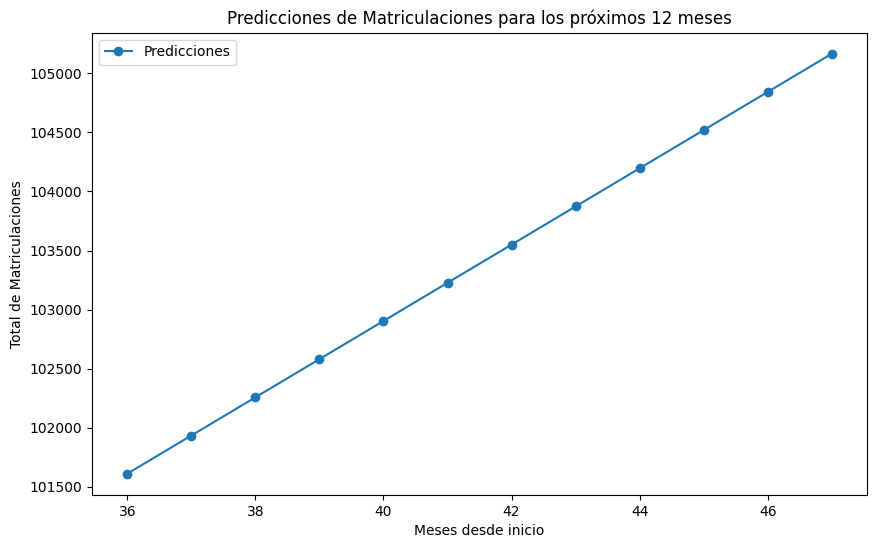

In [13]:
# Preparar datos para la predicción de los próximos 12 meses
next_12_months = np.arange(1, 13) + X['Month_Num'].max()
predictions_next_12_months = model.predict(next_12_months.reshape(-1, 1))

# Visualizar las predicciones
plt.figure(figsize=(10, 6))
plt.plot(next_12_months, predictions_next_12_months, label='Predicciones', marker='o')
plt.title('Predicciones de Matriculaciones para los próximos 12 meses')
plt.xlabel('Meses desde inicio')
plt.ylabel('Total de Matriculaciones')
plt.legend()
plt.show()